In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Get DIV2K datasets

In [ ]:
!wget -O /content/gdrive/MyDrive/div2k_trainhr_set.zip http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
!wget -O /content/gdrive/MyDrive/div2k_trainlr_set.zip https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip

--2024-01-06 18:57:40--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip [following]
--2024-01-06 18:57:40--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117763600 (112M) [application/zip]
Saving to: ‘/content/gdrive/MyDrive/div2k_trainhr_set.zip’

/content/gdrive/MyD 100%[===================>] 112.31M  21.9MB/s    in 6.2s    

2024-01-06 18:57:47 (18.2 MB/s) - ‘/content/gdrive/MyDrive/div2k_trainhr_set.zip’ saved [117763600/117763600]

--2024-01-06 18:57:47--  https:/

In [ ]:
import os
folder_path = '/content/gdrive/MyDrive/super-res_project/Data/raw'
os.makedirs(folder_path, exist_ok=True)

In [ ]:
!unzip /content/gdrive/MyDrive/div2k_trainhr_set.zip -d /content/gdrive/MyDrive/super-res_project/Data/raw
!unzip /content/gdrive/MyDrive/div2k_trainlr_set.zip -d /content/gdrive/MyDrive/super-res_project/Data/raw

Archive:  /content/gdrive/MyDrive/div2k_trainhr_set.zip
   creating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0870x2.png  
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0841x2.png  
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0853x2.png  
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0835x2.png  
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0818x2.png  
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0831x2.png  
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0824x2.png  
  inflating: /content/gdrive/MyDrive/super-res_project/Data/raw/DIV2K_valid_LR_bicubic/X2/0832x2.png  
  inflating: /content/gdrive/

In [ ]:
# rename for personal preference
folder_path = '/content/gdrive/MyDrive/super-res_project/Data/raw'
os.rename(os.path.join(folder_path,'DIV2K_valid_LR_bicubic'), os.path.join(folder_path,'DIV2K_train_LR_bicubic'))
os.rename(os.path.join(folder_path,'DIV2K_valid_HR'), os.path.join(folder_path,'DIV2K_train_HR'))

### Put together a  random subset of corresponding low-high resolution pairs from our DIV2K data set, then extract/crop patches from each pair and process them, then get this data ready and save later for train, val, and test

In [ ]:
import image_utils
import numpy as np
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
# # This is how to get the random subset of the div2k dataset and use that for train, val, test
# # and set up the proper folder organizations
parent_path = '/content/gdrive/MyDrive/super-res_project/Data/raw'

train_hr_dataset_path = os.path.join(parent_path, 'DIV2K_train_HR')
train_lr_dataset_path = os.path.join(parent_path, 'DIV2K_train_LR_bicubic/X2')

dest_dir = os.path.join(parent_path,'raw_DIV2K_subset')
os.makedirs(dest_dir, exist_ok=True)

subset_size = 70 #take random 70/100 images
image_utils.make_subset(train_hr_dataset_path, train_lr_dataset_path, dest_dir,sample_size=subset_size)

In [ ]:
# # quick check that everything is corresponding
# !ls {dest_dir+"/HR"}
# !ls {dest_dir+"/LR"}

0801.png  0810.png  0827.png  0835.png	0846.png  0854.png  0867.png  0877.png	0887.png  0894.png
0803.png  0813.png  0828.png  0836.png	0847.png  0855.png  0869.png  0878.png	0888.png  0895.png
0804.png  0814.png  0829.png  0837.png	0848.png  0856.png  0870.png  0879.png	0889.png  0896.png
0805.png  0816.png  0830.png  0840.png	0849.png  0857.png  0871.png  0880.png	0890.png  0897.png
0807.png  0822.png  0831.png  0841.png	0850.png  0858.png  0872.png  0883.png	0891.png  0898.png
0808.png  0823.png  0832.png  0843.png	0851.png  0863.png  0874.png  0884.png	0892.png  0899.png
0809.png  0826.png  0834.png  0844.png	0852.png  0866.png  0876.png  0886.png	0893.png  0900.png
0801x2.png  0814x2.png	0831x2.png  0844x2.png	0855x2.png  0871x2.png	0884x2.png  0894x2.png
0803x2.png  0816x2.png	0832x2.png  0846x2.png	0856x2.png  0872x2.png	0886x2.png  0895x2.png
0804x2.png  0822x2.png	0834x2.png  0847x2.png	0857x2.png  0874x2.png	0887x2.png  0896x2.png
0805x2.png  0823x2.png	0835x2.png  0848x2.png

In [ ]:
# # This is how to split the data for train, val, test

parent_path = '/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset'
lr_images = os.listdir(os.path.join(parent_path, 'LR'))
hr_images = os.listdir(os.path.join(parent_path, 'HR'))
lr_images.sort()
hr_images.sort()

# # quick check that LR-HR pair looks corresponded
# print(len(lr_images), len(hr_images))
# print(lr_images[:10])
# print(hr_images[:10])

# Split the dataset
from sklearn.model_selection import train_test_split
train_lr, test_lr, train_hr, test_hr = train_test_split(lr_images, hr_images, test_size=0.2, random_state=SEED)
# 80% training and 20% testing ->  training: 56, testing: 14

train_lr, val_lr, train_hr, val_hr = train_test_split(train_lr, train_hr, test_size=0.25, random_state=SEED)
# Splitting the 80% into 60% training and 20% validation -> training: 42, validation: 14, testing: 14

train_lr shape: 42
val_lr shape: 14
test_lr shape: 14
train_hr shape: 42
val_hr shape: 14
test_hr shape: 14


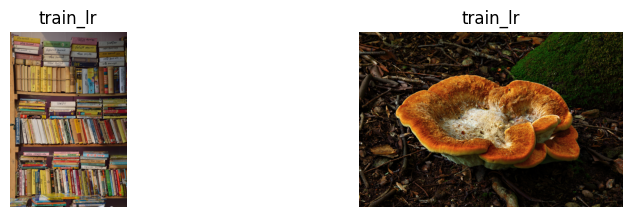

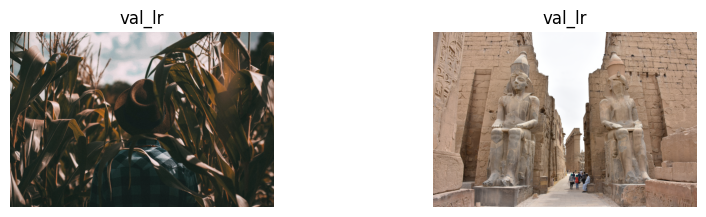

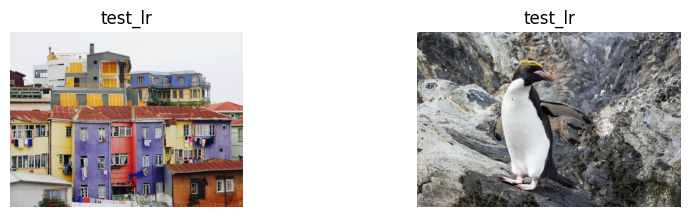

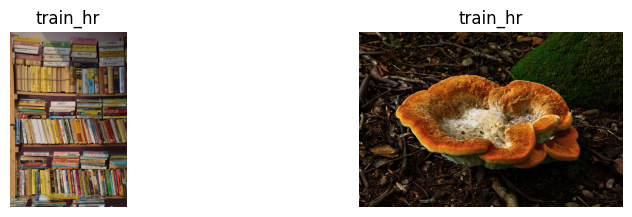

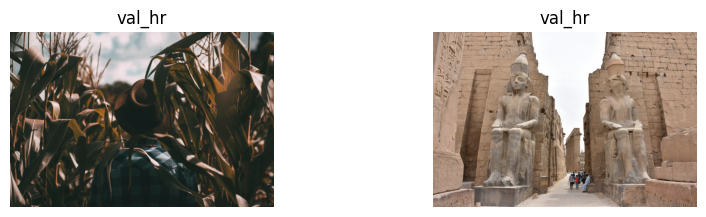

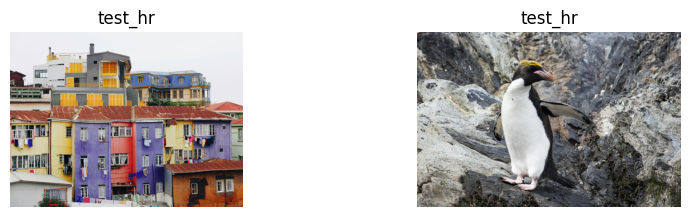

In [ ]:
# # Inspect our splits
# print("train_lr shape:", len(train_lr))
# print("val_lr shape:", len(val_lr))
# print("test_lr shape:", len(test_lr))
# print("train_hr shape:", len(train_hr))
# print("val_hr shape:", len(val_hr))
# print("test_hr shape:", len(test_hr))

# image_utils.display_sample_images(train_lr, "train_lr")
# image_utils.display_sample_images(val_lr, "val_lr")
# image_utils.display_sample_images(test_lr, "test_lr")
# image_utils.display_sample_images(train_hr, "train_hr", is_lr=False)
# image_utils.display_sample_images(val_hr, "val_hr",is_lr=False)
# image_utils.display_sample_images(test_hr, "test_hr",is_lr=False)

### Processing

In [ ]:
# Check what the LR constraint dimension is for cropping
# LR downcaled x2 by contruction is half the size of its corresponding HR

folder_path = '/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR'
image_utils.get_min_image_dim(folder_path) # we can safely crop the standard 64x64 or 128x128

Min width, height: (678, 408)


LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0867x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0867.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0858x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0858.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0829x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0829.png'
(10, 128, 128, 3)
(10, 64, 64, 3)


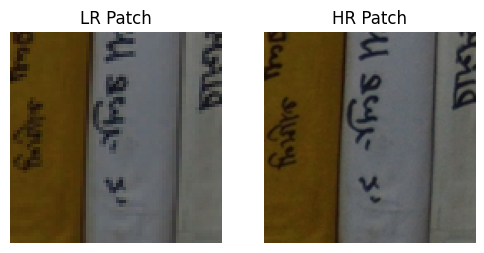

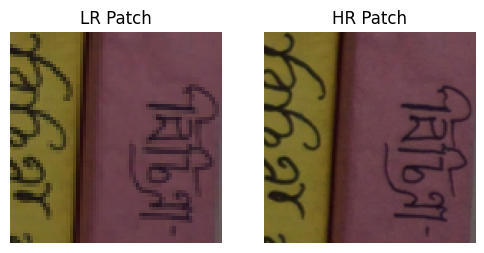

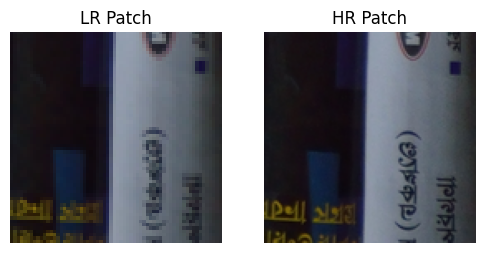

In [ ]:
# Training set: normalize pixels, extract patches, augment
# Extract 10 random patches from each image pair to get 420 low-high resolution patch pairs
import tensorflow as tf
parent_path = '/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset'
lr_img_paths = tf.data.Dataset.from_tensor_slices([os.path.join(parent_path,"LR", file_name) for file_name in train_lr])
hr_img_paths = tf.data.Dataset.from_tensor_slices([os.path.join(parent_path,"HR", file_name) for file_name in train_hr])
train_dataset = tf.data.Dataset.zip((lr_img_paths, hr_img_paths))

# Inspect file name LR-HR correspondance
for lr_pth, hr_pth in train_dataset.take(3):
  print("LR path:", lr_pth.numpy(), "HR path:", hr_pth.numpy())

# Process data and get patches
NUM_PATCHES = 10
train_dataset = train_dataset.map(lambda x, y: image_utils.process_image(x,y,num_patches=NUM_PATCHES,augment=True))

# Make sure pairs are actually corresponding and aligned
import matplotlib.pyplot as plt
def show(lr_patches, hr_patches, n):
  # hr_patches and lr_patches are tensors with shape [num_patches=10, height, width, channels]
  num_patches = hr_patches.shape[0]
  print(hr_patches.shape)
  print(lr_patches.shape)
  # Visualize the patches
  for i in range(min(num_patches,n)):
      plt.figure(figsize=(6, 3))

      # High-Resolution Patch
      plt.subplot(1, 2, 1)
      plt.imshow(lr_patches[i].numpy())
      plt.title("LR Patch")
      plt.axis('off')

      # The coresponding Low-Resolution Patch
      plt.subplot(1, 2, 2)
      plt.imshow(hr_patches[i].numpy())
      plt.title("HR Patch")
      plt.axis('off')

      plt.show()

for lr_patches, hr_patches in train_dataset.take(1):  # take 1 batch
  show(lr_patches, hr_patches, 3 )


LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0893x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0893.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0874x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0874.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0866x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0866.png'
(10, 128, 128, 3)
(10, 64, 64, 3)


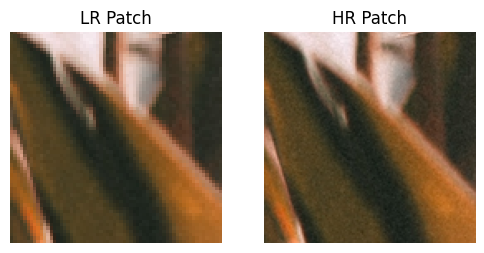

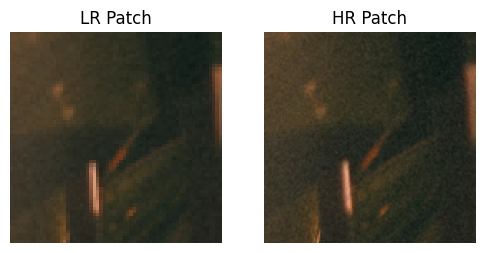

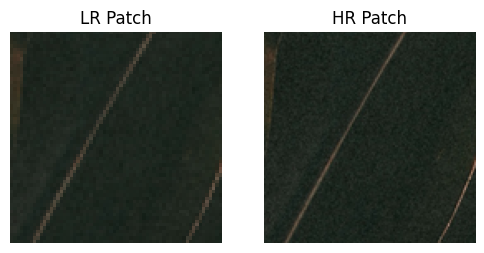

LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0836x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0836.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0801x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0801.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/LR/0877x2.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_DIV2K_subset/HR/0877.png'
(10, 128, 128, 3)
(10, 64, 64, 3)


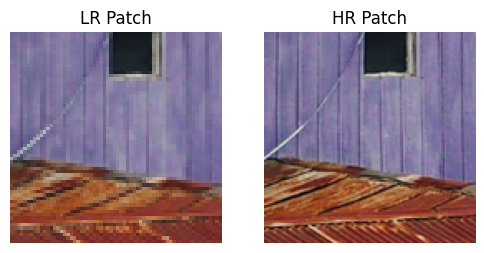

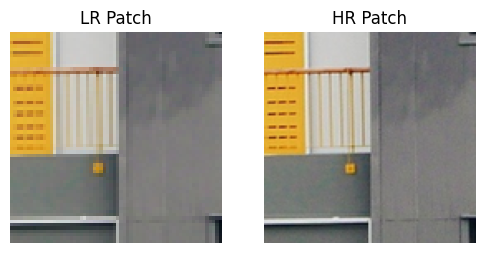

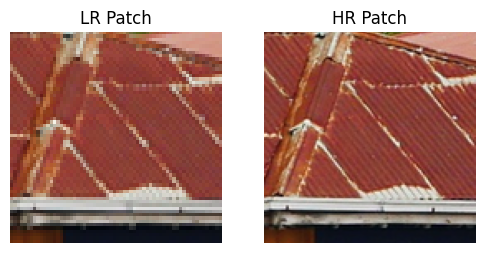

In [ ]:
# Validation set: normalize pixels, extract patches, no augment
# Extract 10 random patches from each image pair to get 140 low-high resolution patch pairs
lr_img_paths = tf.data.Dataset.from_tensor_slices([os.path.join(parent_path,"LR", file_name) for file_name in val_lr])
hr_img_paths = tf.data.Dataset.from_tensor_slices([os.path.join(parent_path,"HR", file_name) for file_name in val_hr])
val_dataset = tf.data.Dataset.zip((lr_img_paths, hr_img_paths))

# Inspect file name LR-HR correspondance
for lr_pth, hr_pth in val_dataset.take(3):
  print("LR path:", lr_pth.numpy(), "HR path:", hr_pth.numpy())

# Process and get patches
val_dataset = val_dataset.map(lambda x, y: image_utils.process_image(x,y,num_patches=NUM_PATCHES))

# Check patch alignment:
for lr_patches, hr_patches in val_dataset.take(1):  # take 1 batch
  show(lr_patches, hr_patches, 3)

# Test set: normalize pixels, extract patches, no augment
# Extract 10 random patches from each image pair to get 140 low-high resolution patch pairs
lr_img_paths = tf.data.Dataset.from_tensor_slices([os.path.join(parent_path,"LR", file_name) for file_name in test_lr])
hr_img_paths = tf.data.Dataset.from_tensor_slices([os.path.join(parent_path,"HR", file_name) for file_name in test_hr])
test_dataset = tf.data.Dataset.zip((lr_img_paths, hr_img_paths))

# Inspect file name LR-HR correspondance
for lr_pth, hr_pth in test_dataset.take(3):
  print("LR path:", lr_pth.numpy(), "HR path:", hr_pth.numpy())

# Process and get patches
test_dataset = test_dataset.map(lambda x, y: image_utils.process_image(x,y,num_patches=NUM_PATCHES))

# Check patch alignment:
for lr_patches, hr_patches in test_dataset.take(1):  # take 1 batch
  show(lr_patches, hr_patches, 3)

### After making sure of alignment and correspondance between the low-high res images, resize/flatten to prep for training

In [ ]:
def patch_concatenation(dataset):
    """
    Concatenate data from a dataset of LR and HR image stacks.

    Args:
    - dataset: A TensorFlow dataset containing LR and HR image stacks.

    Returns:
    - lr_patches_concat: A concatenated TensorFlow tensor containing LR image patches.
      with Shape: [num_patches, lr_height, lr_width, channels]
    - hr_patches_concat: A concatenated TensorFlow tensor containing HR image patches.
      with Shape: [num_patches, hr_height, hr_width, channels]
    """
    lr_stacks = []
    hr_stacks = []
    for lr_stack, hr_stack in dataset:
      lr_stacks.append(lr_stack)
      hr_stacks.append(hr_stack)

    lr_patches_concat = tf.concat(lr_stacks, axis=0)
    hr_patches_concat = tf.concat(hr_stacks, axis=0)

    return lr_patches_concat, hr_patches_concat


In [ ]:
# Get the final train, val, test data
train_lr_patches, train_hr_patches = patch_concatenation(train_dataset)
val_lr_patches, val_hr_patches = patch_concatenation(val_dataset)
test_lr_patches, test_hr_patches = patch_concatenation(test_dataset)

### Save processed data

In [ ]:
path = '/content/gdrive/MyDrive/super-res_project/Data'
train_path = os.path.join(path,"train")
val_path = os.path.join(path,"val")
test_path = os.path.join(path,"test")

# Make these folders, update folder structure
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Save
# Train
np.save(os.path.join(train_path,'lr_patches.npy'), train_lr_patches.numpy())
np.save(os.path.join(train_path,'hr_patches.npy'), train_hr_patches.numpy())

#Val
np.save(os.path.join(val_path,'lr_patches.npy'), val_lr_patches.numpy())
np.save(os.path.join(val_path,'hr_patches.npy'), val_hr_patches.numpy())

#Test
np.save(os.path.join(test_path,'lr_patches.npy'), test_lr_patches.numpy())
np.save(os.path.join(test_path,'hr_patches.npy'), test_hr_patches.numpy())


## Next, process some extra LR-HR patch pair images for benchmarking  (using all of Set5, Set14, and partial from BSD100), very similar process as above just no augmentation and crop less patches per pair

If you downloaded the .zip files that I linked, you would need to manually drag and drop a couple of folders that are relevant to our project (ie scale-reduction-factor x2 low-res image, and its corresponding high res image) and set up your preferred folder organization before proceeding. I have already done so and will include the data files in the organization I used, so I continue on from there below:

In [ ]:
parent_path = '/content/gdrive/MyDrive/super-res_project/Data/raw'

hr_source_dirs = [os.path.join(parent_path,'Set14','HR'),
                  os.path.join(parent_path,'Set5','HR'),
                  os.path.join(parent_path,'BSD100','HR')]


lr_source_dirs = [os.path.join(parent_path,'Set14','LR'),
                  os.path.join(parent_path,'Set5','LR'),
                  os.path.join(parent_path,'BSD100','LR')]

dest = os.path.join(parent_path,'raw_benchmark_subset')
start_index = 0

# Get a subset of the LR-HR paired images from all of Set5, all of Set14, and random 81 from BSD100
# Re-number each image so they are unique
# Update folder organization
for hr_dir, lr_dir in zip(hr_source_dirs, lr_source_dirs):
  print(hr_dir, lr_dir)
  sample_size = 14 if "Set14" in hr_dir else 5 if "Set5" in hr_dir else 81
  image_utils.make_subset(hr_dir, lr_dir, dest, sample_size, start_index)
  start_index += sample_size

/content/gdrive/MyDrive/super-res_project/Data/raw/Set14/HR /content/gdrive/MyDrive/super-res_project/Data/raw/Set14/LR
/content/gdrive/MyDrive/super-res_project/Data/raw/Set5/HR /content/gdrive/MyDrive/super-res_project/Data/raw/Set5/LR
/content/gdrive/MyDrive/super-res_project/Data/raw/BSD100/HR /content/gdrive/MyDrive/super-res_project/Data/raw/BSD100/LR


In [ ]:
# #Manually go check that the low-high pairs match, should have 100 each, labeled 1-100
# # Then a quick check that everything is corresponding

dest_dir = os.path.join(parent_path,'raw_benchmark_subset')
# !ls {dest_dir+"/HR"}
# !ls {dest_dir+"/LR"}

lr_images = sorted(os.listdir(os.path.join(dest_dir, 'LR')))
print("LR: ", lr_images[:5])
hr_images = sorted(os.listdir(os.path.join(dest_dir, 'HR')))
# doesnt have to be in chronological order
#only matters that LR-HR pairs are corresponding in index in the array
print("HR: ", hr_images[:5])

LR:  ['100_LR.png', '10_LR.png', '11_LR.png', '12_LR.png', '13_LR.png']
HR:  ['100_HR.png', '10_HR.png', '11_HR.png', '12_HR.png', '13_HR.png']


### Process

In [ ]:
# Check what the LR constraint dimension is for cropping
# LR downcaled x2 by contruction is half the size of its corresponding HR

image_utils.get_min_image_dim(os.path.join(dest_dir,"LR")) # we can safely crop the standard 64x64 or 128x128

Min width, height: (114, 128)


In [ ]:
lr_paths = tf.data.Dataset.from_tensor_slices(
    [os.path.join(dest_dir, "LR", file_name) for file_name in lr_images])
hr_paths = tf.data.Dataset.from_tensor_slices(
    [os.path.join(dest_dir, "HR", file_name) for file_name in hr_images])
benchmark_dataset = tf.data.Dataset.zip((lr_paths, hr_paths))

#sanity check that this didnt fail in correspondance LR-HR
for lr_pth, hr_pth in benchmark_dataset.take(5):
  print("LR path:", lr_pth.numpy(), "HR path:", hr_pth.numpy())

LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/LR/100_LR.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/HR/100_HR.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/LR/10_LR.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/HR/10_HR.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/LR/11_LR.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/HR/11_HR.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/LR/12_LR.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/HR/12_HR.png'
LR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/LR/13_LR.png' HR path: b'/content/gdrive/MyDrive/super-res_project/Data/raw/raw_benchmark_subset/HR/13_HR.png'


(3, 128, 128, 3)
(3, 64, 64, 3)


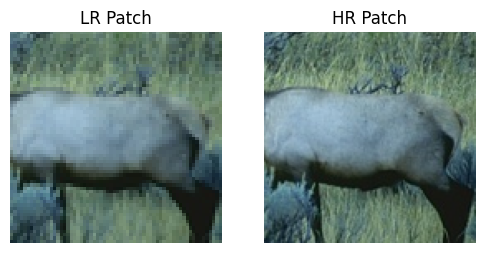

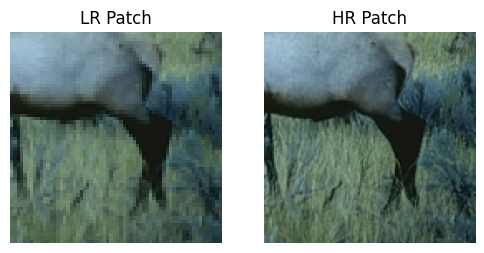

(3, 128, 128, 3)
(3, 64, 64, 3)


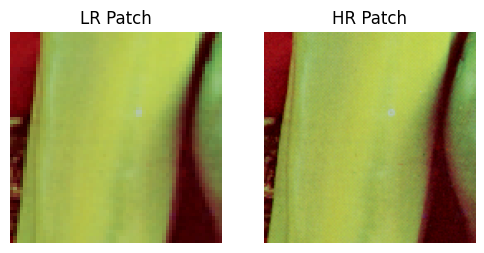

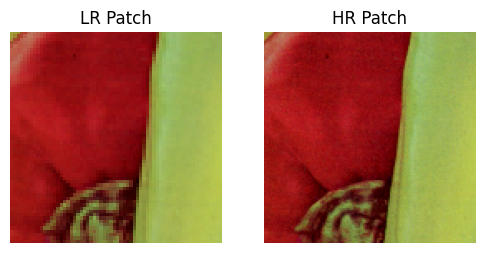

(3, 128, 128, 3)
(3, 64, 64, 3)


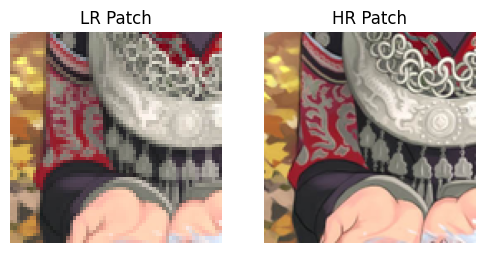

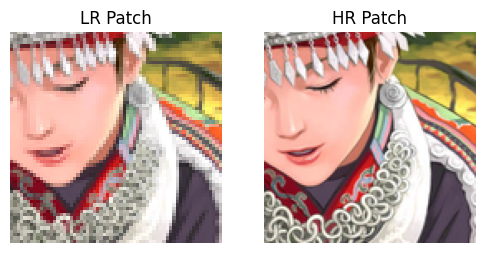

(3, 128, 128, 3)
(3, 64, 64, 3)


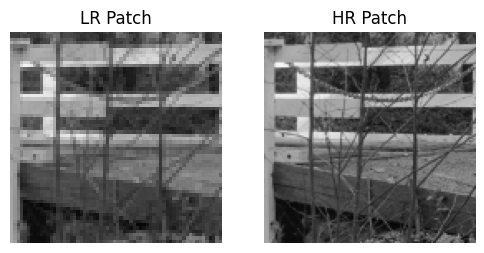

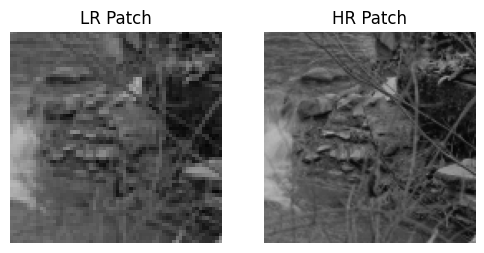

In [ ]:
benchmark_num_patches = 3
benchmark_dataset = benchmark_dataset.map(lambda x, y: image_utils.process_image(x, y, num_patches=benchmark_num_patches))

# Check patch alignment
for lr_patches, hr_patches in benchmark_dataset.take(4):  #take 4 batches
  show(lr_patches, hr_patches, 2) # each batch has 3 patches by construction, show 2

### Save processed benchmark data

In [ ]:
# Get the final benchmarking data
benchmark_lr_patches, benchmark_hr_patches = patch_concatenation(benchmark_dataset)

benchmark_data_path = '/content/gdrive/MyDrive/super-res_project/Data/benchmark'
os.makedirs(benchmark_data_path, exist_ok=True)

# Save
np.save(os.path.join(benchmark_data_path,'lr_patches.npy'), benchmark_lr_patches.numpy())
np.save(os.path.join(benchmark_data_path,'hr_patches.npy'), benchmark_hr_patches.numpy())